# Model selection statistic by data length

Paper plot using data generated by the hvblock_hyperparameter_model_selection.ipynb notebook

In [1]:
import pandas as pd
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import arx.experiments as ex

In [2]:
ldata = pd.read_csv('../results/1-hard-by-length.csv').sort_values('T')
ldata.head()

,T,alpha,scheme,bmark_mean,bmark_std,cv_mean,cv_std,err_mean,err_std,sigsq_star,...,phi_mA,phi_mB,cv_lower_q,cv_upper_q,cv_negshare,bm_lower_q,bm_upper_q,bm_negshare,phi_star_1,phi_star_2
220,2,0.75,LOO,-0.205117,0.063566,-0.227311,0.172205,-0.022194,0.145666,1.0,...,[0.37911815],[0.15020658],-0.671954,0.263304,0.9298,-0.260208,0.035604,0.9831,0.5625,0.15
234,2,1.00,LOO,-0.209321,0.059935,-0.231536,0.155214,-0.022215,0.136865,1.0,...,[0.56661814],[0.33770655],-0.669418,0.158893,0.9527,-0.257939,0.020816,0.9873,0.7500,0.20
235,2,1.00,"hv-block (h=3, v=3)",-0.195270,0.000000,-0.226277,0.188213,-0.031007,0.188213,1.0,...,[0.56661814],[0.33770655],-0.760380,0.138341,0.9353,-0.195270,-0.195270,1.0000,0.7500,0.20
192,2,0.00,LOO,-0.140878,0.028180,-0.175343,0.152567,-0.034465,0.136279,1.0,...,[-0.18338185],[-0.41229344],-0.537589,0.274711,0.9044,-0.168154,-0.039616,0.9974,0.0000,0.00
193,2,0.00,"hv-block (h=3, v=3)",-0.195270,0.000000,-0.226277,0.188213,-0.031007,0.188213,1.0,...,[-0.18338185],[-0.41229344],-0.760379,0.138341,0.9353,-0.195270,-0.195270,1.0000,0.0000,0.00


In [3]:
#schemes = ldata.scheme.unique()
schemes = ['LOO', 'hv-block (h=3, v=3)']
labels = ['LOO (pointwise)', 'hv-block (joint)']

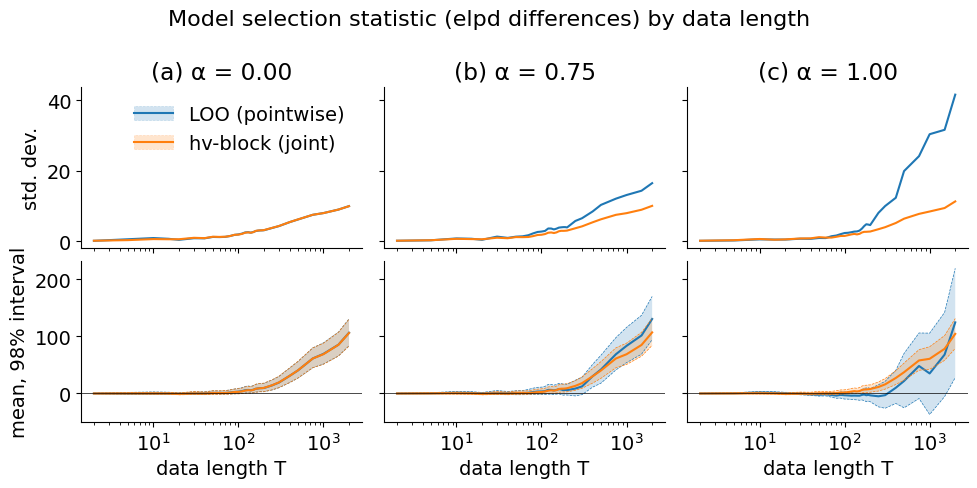

In [9]:
plt.rcParams.update({'font.size': 14})
ALPHAS = [0.0, 0.75, 1.0]
fig, axes = plt.subplots(nrows=2, ncols=len(ALPHAS), figsize=(10, 5), sharey='row', sharex=True)

handles = []

for ax in axes.ravel():
    ax.set_xscale('log')
    ax.spines[['top','right']].set_visible(False)

for i, (ax, alpha) in enumerate(zip(axes[0,:], ALPHAS)):
    for j, scheme in enumerate(schemes):
        sel = np.bitwise_and(ldata.alpha == alpha, ldata.scheme == scheme)
        pl = ax.plot(ldata[sel]['T'], ldata[sel].cv_std)
    ax.set_title(f"({chr(ord('a')+i)}) α = {alpha:.2f}")
    #ax.set_xlim(xmin=1)
    ax.tick_params(labelbottom=False)

axes[0, 0].set_ylabel("std. dev.")

for i, (ax, alpha) in enumerate(zip(axes[1,:], ALPHAS)):
    for j, scheme in enumerate(schemes):
        sel = np.bitwise_and(ldata.alpha == alpha, ldata.scheme == scheme)
        t = ldata[sel]['T']
        cv_lower, cv_upper = ldata[sel].cv_lower_q, ldata[sel].cv_upper_q
        pl = ax.plot(t, ldata[sel].cv_mean)
        ax.plot(t, cv_lower, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        ax.plot(t, cv_upper, linewidth=0.5, color=pl[0].get_color(), linestyle='--')
        fi = ax.fill_between(t, cv_lower, cv_upper, alpha=0.2)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0.5, linestyle='--', color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
    ax.set_xlabel("data length T")
    ax.axhline(0, color='black', linewidth=0.5)
    #ax.set_xlim(xmin=1)

axes[1,0].set_ylabel("mean, 98% interval")

axes[0,0].legend(handles, labels, frameon=False)

fig.suptitle("Model selection statistic (elpd differences) by data length", fontsize=16)
fig.tight_layout()
plt.subplots_adjust(wspace=0.08, hspace=0.08)

fig.savefig("../../paper/figures/by-length.svg")